In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, firwin, upfirdn
import scipy.fftpack as fftpack
# import string

In [2]:

#making the data reproducible by setting up the seed (these random functions are psuedo random)
np.random.seed(0)

# Generate a random binary stream of characters
binary_characters = ''.join(np.random.choice([c for c in '01'], size=20*2))

# Convert binary characters to integers
data = [int(binary_characters[i:i+2], 2) for i in range(0, len(binary_characters), 2)]

# 2. Modulating the Binary Stream for 4-PAM:
symbols = 2 * np.array(data) - 3


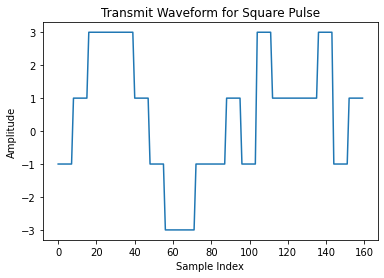

In [3]:

# 3. Plotting Transmit Waveform for Square Pulse:
square_pulse = np.ones(8)
transmit_waveform_square = np.kron(symbols, square_pulse)

plt.plot(transmit_waveform_square)
plt.title('Transmit Waveform for Square Pulse')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()


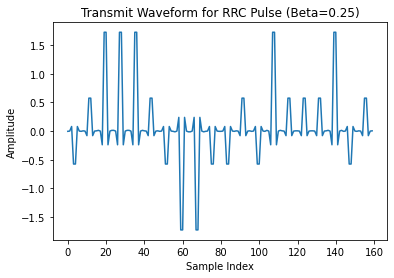

In [4]:

# 4. Plotting Transmit Waveform for RRC Pulse with Beta = 0.25:
# Designing RRC filter using firwin
beta = 0.25
taps = 8
rrc_filter = firwin(taps, 1/(1+beta), window='hamming')

# Creating the transmit waveform for RRC pulse
transmit_waveform_rrc = upfirdn(rrc_filter, symbols, 8)

plt.plot(transmit_waveform_rrc)
plt.title('Transmit Waveform for RRC Pulse (Beta=0.25)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()


/tmp/ipykernel_149657/3248392469.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f_axis_square / 1e6, 20 * np.log10(np.abs(X_square)), label='Square Pulse')
/tmp/ipykernel_149657/3248392469.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f_axis_rrc / 1e6, 20 * np.log10(np.abs(X_rrc)), label='RRC Pulse (Beta=0.25)')


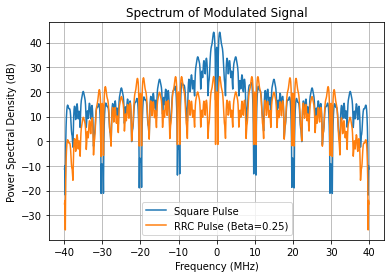

In [5]:

# 5. Plotting the Spectrum of the Transmitted Signal:
xm_square = np.kron(symbols, square_pulse)
xm_rrc = upfirdn(rrc_filter, symbols, 8)

# FFT for square pulse
X_square = fftpack.fftshift(fftpack.fft(xm_square, 800))
f_axis_square = np.arange(800) * 80e6 / 800 - 40e6

# FFT for RRC pulse
X_rrc = fftpack.fftshift(fftpack.fft(xm_rrc, 800))
f_axis_rrc = np.arange(800) * 80e6 / 800 - 40e6

# Plotting the spectrum
plt.plot(f_axis_square / 1e6, 20 * np.log10(np.abs(X_square)), label='Square Pulse')
plt.plot(f_axis_rrc / 1e6, 20 * np.log10(np.abs(X_rrc)), label='RRC Pulse (Beta=0.25)')
plt.title('Spectrum of Modulated Signal')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power Spectral Density (dB)')
plt.legend()
plt.grid(True)
plt.show()


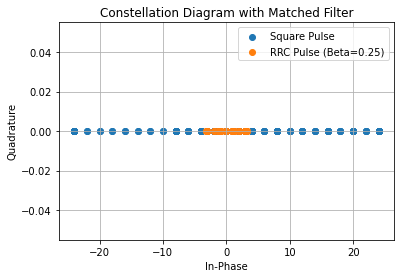

In [6]:

# 6. Choosing the Appropriate Matched Filter:
matched_filter = square_pulse  # Use the square pulse as the matched filter

# 7. Plotting Constellation Diagram:
received_symbols_square = convolve(transmit_waveform_square, matched_filter, mode='valid')
received_symbols_rrc = convolve(transmit_waveform_rrc, matched_filter, mode='valid')

plt.scatter(np.real(received_symbols_square), np.imag(received_symbols_square), label='Square Pulse')
plt.scatter(np.real(received_symbols_rrc), np.imag(received_symbols_rrc), label='RRC Pulse (Beta=0.25)')
plt.title('Constellation Diagram with Matched Filter')
plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.legend()
plt.grid(True)
plt.show()
